In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./BuyOffersByQtyPurchased.csv', header=0, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427048 entries, 0 to 427047
Data columns (total 13 columns):
CatalogID                                    427048 non-null int64
CatalogBinding                               427048 non-null object
qty_Purchased                                427048 non-null int64
R4BuyOfferAmt                                427047 non-null float64
R4sBuyOfferAmt                               427047 non-null float64
R4BuyOfferPct                                427048 non-null float64
R4sBuyOfferPct                               427048 non-null float64
Total_Accumulated_Days_With_Trash_Penalty    427048 non-null float64
Total_Item_Count                             427048 non-null int64
Total_Sold                                   427048 non-null int64
Avg_Sale_Price                               427047 non-null float64
avg_Item_Acc_Days                            427048 non-null float64
avg_Sold_Acc_Days                            427048 non-null float64
d

In [4]:
df.dropna(inplace=True)

In [5]:
df['Purchased_Sale_Amt'] = df['qty_Purchased'] * df['Avg_Sale_Price']

In [6]:
df.head(10)

,CatalogID,CatalogBinding,qty_Purchased,R4BuyOfferAmt,R4sBuyOfferAmt,R4BuyOfferPct,R4sBuyOfferPct,Total_Accumulated_Days_With_Trash_Penalty,Total_Item_Count,Total_Sold,Avg_Sale_Price,avg_Item_Acc_Days,avg_Sold_Acc_Days,Purchased_Sale_Amt
0,33262,Mass Market Paperback,3,0.00,0.00,0.0,0.00,1505.30,13,7,2.5642,115.792308,188.162500,7.6926
1,139354,General,5,0.00,0.45,0.0,0.05,1416.49,7,4,8.9900,202.355714,283.298000,44.9500
2,140389,General,5,0.00,0.00,0.0,0.00,2160.26,11,4,4.8700,196.387273,432.052000,24.3500
3,140993,General,15,1.39,1.39,0.2,0.20,1601.69,31,23,6.9354,51.667419,66.737083,104.0310
4,149250,Mass Market Paperback,3,0.00,0.00,0.0,0.00,2078.72,11,4,2.4925,188.974545,415.744000,7.4775
5,40967,General,5,0.00,0.00,0.0,0.00,8730.30,41,8,7.1022,212.934146,970.033333,35.5110
6,40768,General,5,1.51,1.51,0.2,0.20,775.48,12,10,7.5520,64.623333,70.498182,37.7600
7,59820,General,5,0.00,0.09,0.0,0.05,3077.38,15,8,1.8662,205.158667,341.931111,9.3310
8,67826,General,3,2.32,0.58,0.2,0.05,739.15,9,4,11.5940,82.127778,147.830000,34.7820
9,74995,General,6,0.00,0.00,0.0,0.00,1934.37,7,3,7.6600,276.338571,483.592500,45.9600


In [7]:
sns.set_style('whitegrid')

In [8]:
filt_GeneralBinding = df['CatalogBinding'] == 'General'
df_Gen = df[filt_GeneralBinding]

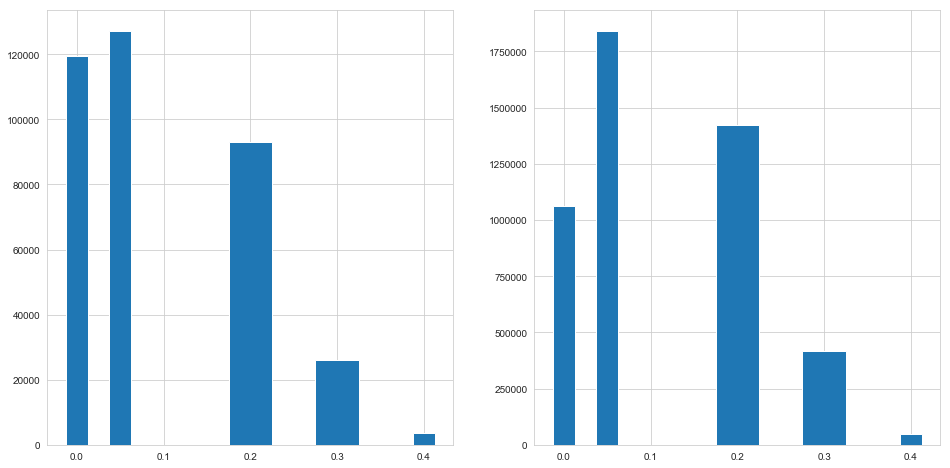

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.hist(df_Gen['R4BuyOfferPct'], bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45], align='left', rwidth=0.5)
ax2.hist(df_Gen['R4BuyOfferPct'], bins=[0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45], weights=df_Gen['qty_Purchased'], align='left', rwidth=0.5)
plt.show()

In [10]:
print(np.histogram(df_Gen['R4BuyOfferPct'], bins=[0, 0.05, 0.2, 0.3, 0.4, 0.45], weights=df_Gen['qty_Purchased']))
print(np.histogram(df_Gen['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999], weights=df_Gen['qty_Purchased']))

(array([1063769, 1842698, 1423736,  415113,   48019], dtype=int64), array([0.  , 0.05, 0.2 , 0.3 , 0.4 , 0.45]))
(array([  47972,  415124, 1423277, 1843102, 1063860], dtype=int64), array([   0,    8,   31,   91,  180, 9999]))


In [11]:
grades_R4Dist = np.histogram(df_Gen['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999], weights=df_Gen['Total_Item_Count'])

In [12]:
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.hist(round(df_Gen['avg_Item_Acc_Days'], 0), range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])
# ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
# ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
# ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
# ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
# ax.set_ylim([0,500000])
# plt.show()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


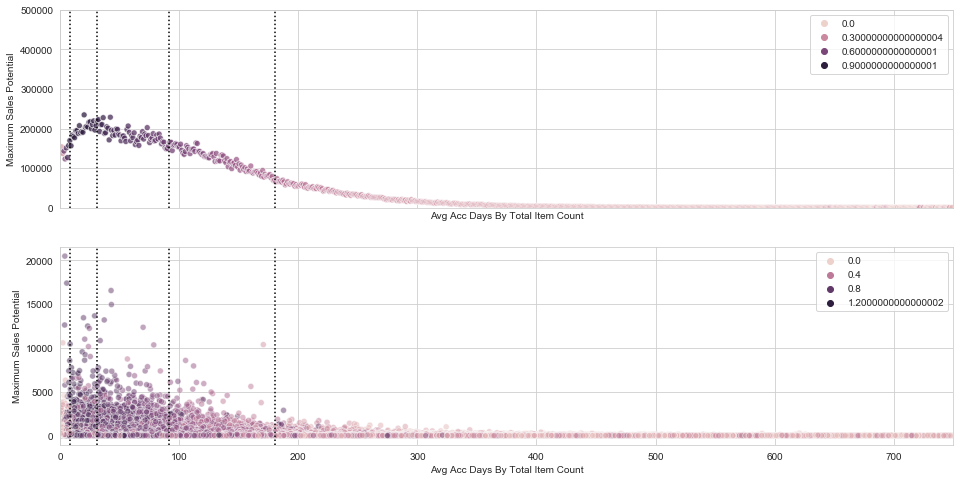

In [13]:
plt_val = np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])
plt_ST = (np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Sold'])[0]/
    np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Item_Count'])[0])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax1,
                alpha = 0.75, hue=plt_ST)
ax1.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlim([0,750])
ax1.set_ylim([0,500000])
ax1.set_xlabel('Avg Acc Days By Total Item Count')
ax1.set_ylabel('Maximum Sales Potential')

sns.scatterplot(df_Gen['avg_Item_Acc_Days'], 
                df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'], ax=ax2,
                alpha = 0.5, hue=df_Gen['Total_Sold']/df_Gen['Total_Item_Count'])
ax2.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlim([0,750])
ax2.set_xlabel('Avg Acc Days By Total Item Count')
ax2.set_ylabel('Maximum Sales Potential')

plt.show()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


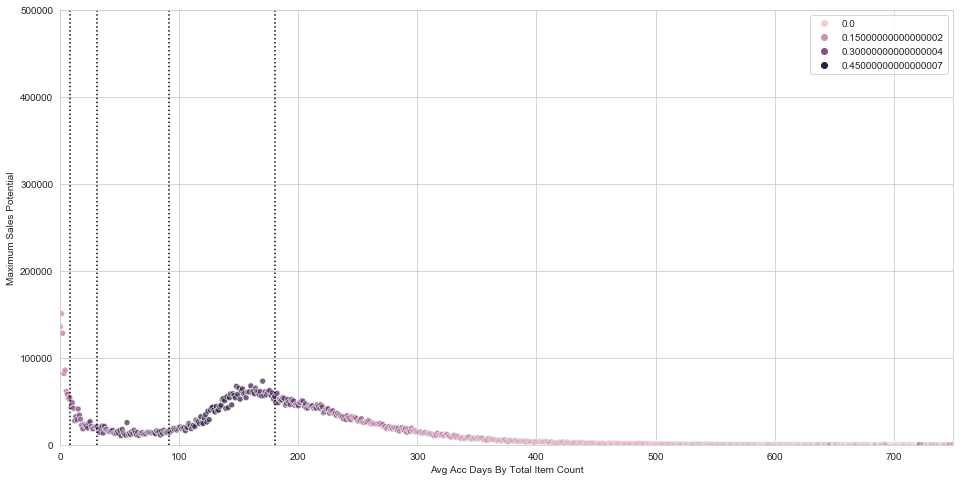

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
filt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5
plt_val = np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_ST = (np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax,
                alpha = 0.75, hue=plt_ST)
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Item Count')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

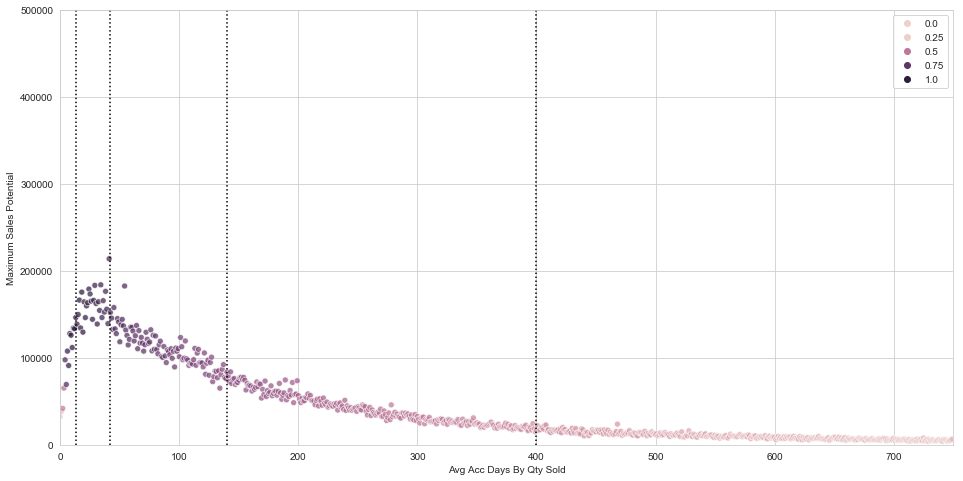

In [15]:
plt_val = np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])
plt_ST = (np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Sold'])[0]/
    np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Item_Count'])[0])
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax,
                alpha = 0.75, hue=plt_ST)
ax.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=140, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=400, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Qty Sold')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

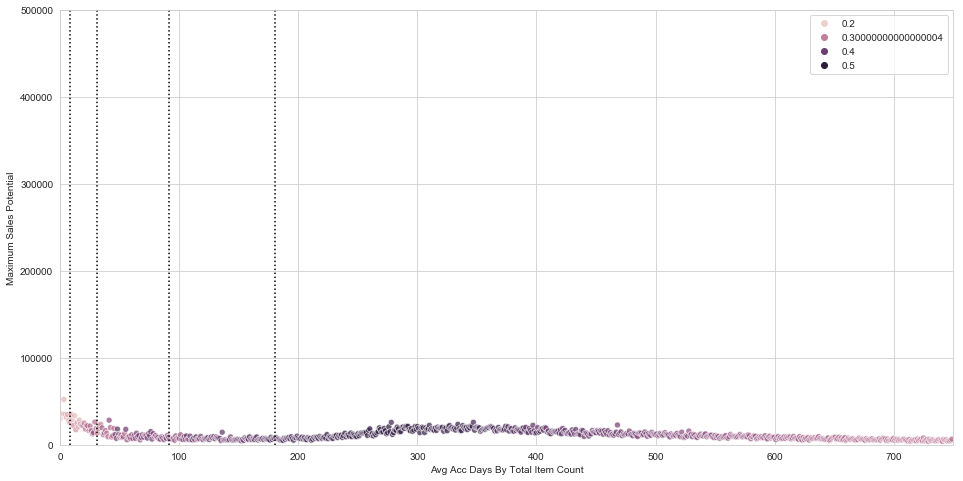

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))
filt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5
plt_val = np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])
plt_ST = (np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax,
                alpha = 0.75, hue=plt_ST)
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Item Count')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

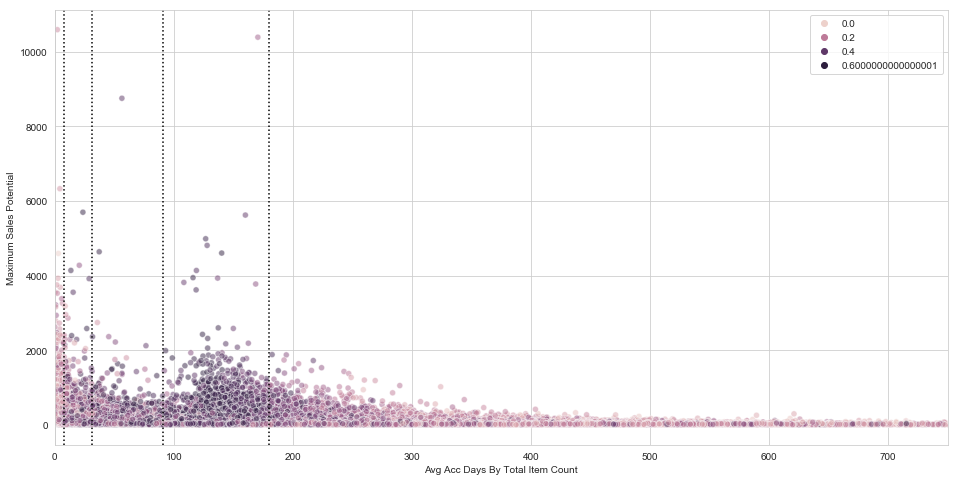

In [17]:
filt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df_Gen[filt_ST]['avg_Item_Acc_Days'], 
                df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'], ax=ax,
                alpha = 0.5, hue=df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
#ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Item Count')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

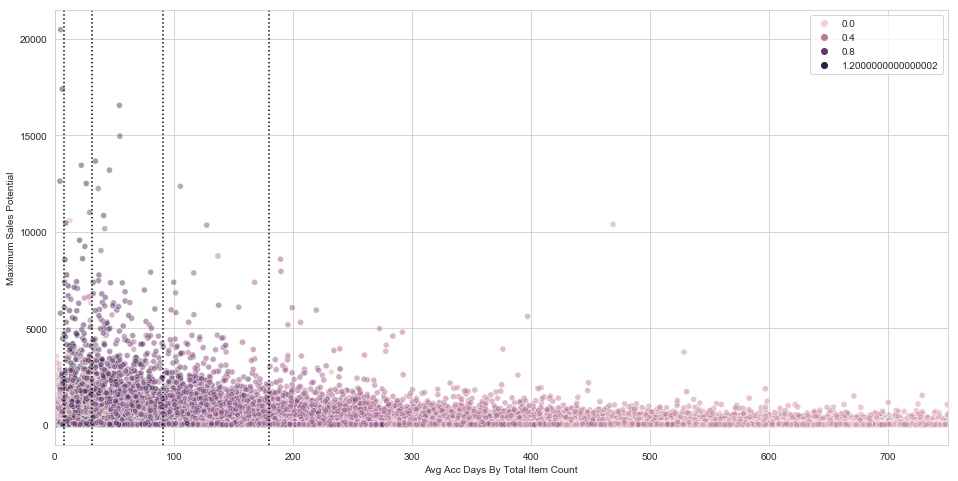

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df_Gen['avg_Sold_Acc_Days'], df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'], ax=ax,
                alpha = 0.5, hue=df_Gen['Total_Sold']/df_Gen['Total_Item_Count'])
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
#ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Item Count')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

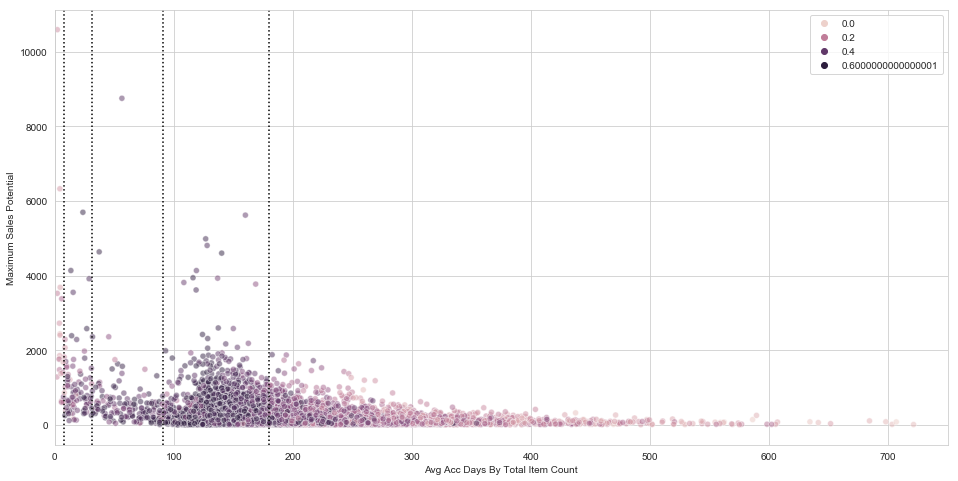

In [19]:
filt_ST = ((df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5) & (df_Gen['Total_Item_Count'] > 100)
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df_Gen[filt_ST]['avg_Item_Acc_Days'], 
                df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'], 
                hue=df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'],
                alpha = 0.5, ax=ax)
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
#ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Item Count')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

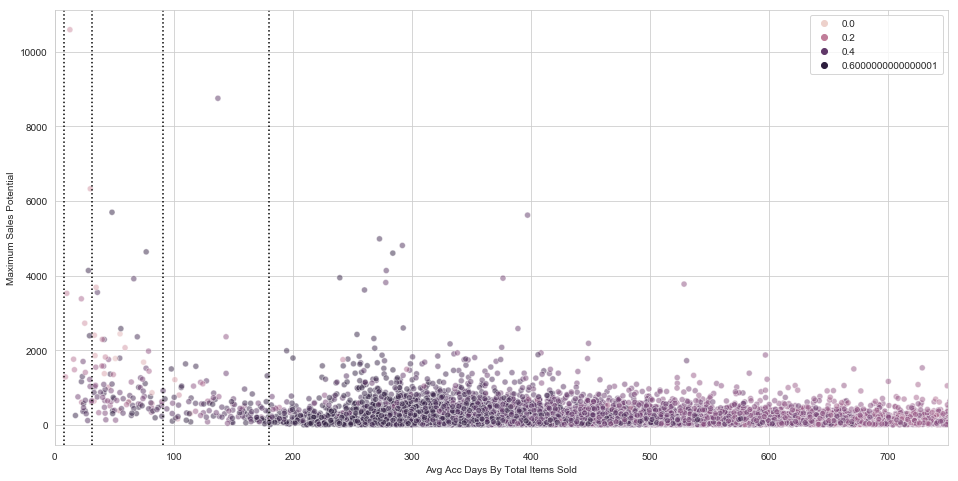

In [20]:
filt_ST = ((df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5) & (df_Gen['Total_Item_Count'] > 100)
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df_Gen[filt_ST]['avg_Sold_Acc_Days'], 
                df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'], 
                hue=df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'],
                alpha = 0.5, ax=ax)
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
#ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Items Sold')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

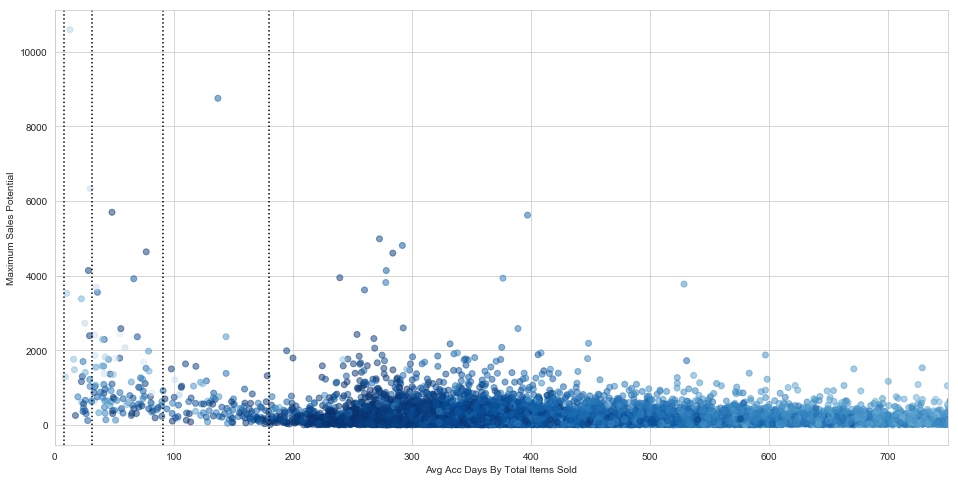

In [21]:
filt_ST = ((df_Gen['Total_Sold']/df_Gen['Total_Item_Count']) < 0.5) & (df_Gen['Total_Item_Count'] > 100)
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df_Gen[filt_ST]['avg_Sold_Acc_Days'], 
                df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'], 
                c=df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'],
                cmap='Blues',
                alpha = 0.5)
ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax.set_xlim([0,750])
#ax.set_ylim([0,500000])
ax.set_xlabel('Avg Acc Days By Total Items Sold')
ax.set_ylabel('Maximum Sales Potential')
plt.show()

In [22]:
filt_CorrectedOffers = (df_Gen['avg_Sold_Acc_Days'] >= 400) & (df_Gen['R4BuyOfferPct'] > 0)
(df_Gen[filt_CorrectedOffers]['R4BuyOfferAmt'] *df_Gen[filt_CorrectedOffers]['qty_Purchased']).sum()

46398.630000000005

In [23]:
(df_Gen['R4BuyOfferAmt'] * df_Gen['qty_Purchased']).sum()

4548891.46

In [24]:
df_Gen['Avg_Sale_Price'].sum()

2702837.6804

In [25]:
dist_GradePcts = [0.4, 0.3, 0.2, 0.1, 0]

In [26]:
dist_R40Grades = np.histogram(df_Gen['avg_Item_Acc_Days'], bins=[0, 8, 31, 91, 180, 9999999], weights=df_Gen['qty_Purchased']*df_Gen['Avg_Sale_Price'])
print(dist_R40Grades[0])

[ 1131093.1511      4533886.29529996 11003462.23640009 10697228.27950091
  5678902.49800165]


In [27]:
grade_Amax = 13
grade_Bmax = 42
grade_Cmax = 140
grade_Dmax = 400
dist_R42Grades = np.histogram(df_Gen['avg_Sold_Acc_Days'], bins=[0, grade_Amax, grade_Bmax, grade_Cmax, grade_Dmax, 9999999], 
                   weights=df_Gen['qty_Purchased']*df_Gen['Avg_Sale_Price'])
print(dist_R42Grades[0])


[ 1177384.5095      4640192.16999996 10782238.46890002 10541129.68790104
  5903627.62400161]


In [28]:
dist_R40Costs = [val*pct for (val, pct) in zip(dist_R40Grades[0], dist_GradePcts)]
dist_R42Costs = [val*pct for (val, pct) in zip(dist_R42Grades[0], dist_GradePcts)]
print(sum(dist_R40Costs), sum(dist_R42Costs))

5083018.424260096 5073572.117370095


In [3]:
df_comp = pd.read_csv('./R42CostComparison.csv', header=0, index_col=0)

In [4]:
df_comp

,BuyOfferPct,R40TotalCost,R42TotalCost,R40QtyPurchased,R42QtyPurchased
CatalogBinding,,,,,
Audio CD,0.00,0.00,0.00,261,438
Audio CD,0.05,96.86,57.67,417,243
Audio CD,0.10,167.65,159.20,196,190
Audio CD,0.30,120.23,139.97,28,31
Audio CD,0.40,40.00,40.00,4,4
Audio CD,999.00,424.74,396.84,906,906
CD,0.00,0.00,0.00,54321,84512
CD,0.05,35213.34,25897.02,143900,102627
CD,0.10,96487.17,97255.00,142304,146048


In [26]:
filt_tots = df_comp['BuyOfferPct'] == 999
df_BindingCost = df_comp[filt_tots]

In [27]:
df_BindingCost_melt = df_BindingCost[['R40TotalCost', 'R42TotalCost']]

In [28]:
df_BindingCost_melt = pd.melt(df_BindingCost_melt.reset_index(), id_vars=['CatalogBinding'], value_vars=df_BindingCost_melt.columns)

In [29]:
df_BindingCost_melt

,CatalogBinding,variable,value
0,Audio CD,R40TotalCost,424.74
1,CD,R40TotalCost,175862.14
2,General,R40TotalCost,5728847.71
3,Mass Market Paperback,R40TotalCost,118740.90
4,Audio CD,R42TotalCost,396.84
5,CD,R42TotalCost,185777.27
6,General,R42TotalCost,5716519.34
7,Mass Market Paperback,R42TotalCost,120497.45


In [24]:
sns.set_style('whitegrid')

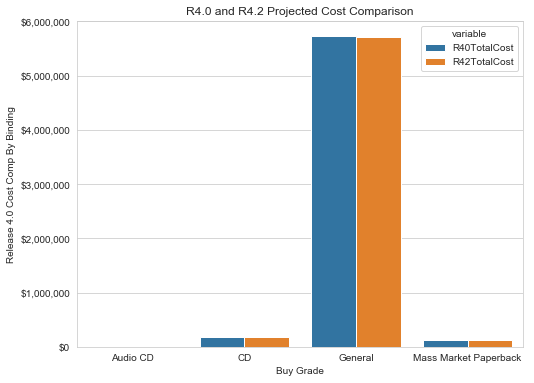

In [31]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=df_BindingCost_melt['CatalogBinding'],
            y=df_BindingCost_melt['value'],
            hue=df_BindingCost_melt['variable'],
            alpha=1,
            ax=ax)
ax.set_yticklabels('${:,.0f}'.format(float(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Grade')
ax.set_ylabel('Release 4.0 Cost Comp By Binding')
plt.title('R4.0 and R4.2 Projected Cost Comparison by Binding')
plt.show()

In [32]:
df_BindingCost

,BuyOfferPct,R40TotalCost,R42TotalCost,R40QtyPurchased,R42QtyPurchased
CatalogBinding,,,,,
Audio CD,999.0,424.74,396.84,906,906
CD,999.0,175862.14,185777.27,356167,356167
General,999.0,5728847.71,5716519.34,5971547,5971547
Mass Market Paperback,999.0,118740.90,120497.45,539376,539376


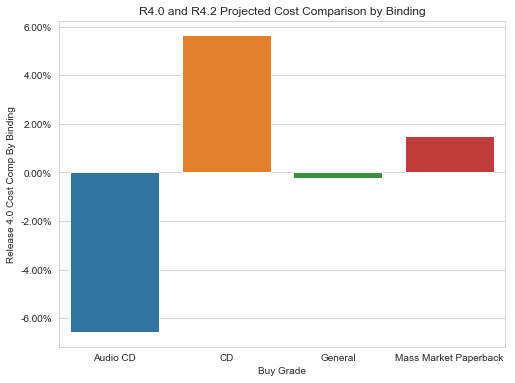

In [37]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=df_BindingCost.index,
            y=(df_BindingCost['R42TotalCost']/df_BindingCost['R40TotalCost'] - 1),
            alpha=1,
            ax=ax)
ax.set_yticklabels('{:,.2%}'.format(float(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Grade')
ax.set_ylabel('Release 4.0 Cost Comp By Binding')
plt.title('R4.0 and R4.2 Projected Cost Comparison by Binding')
plt.show()

In [39]:
df_PctCost = df_comp[~filt_tots].groupby('BuyOfferPct').sum()
df_PctCost

,R40TotalCost,R42TotalCost,R40QtyPurchased,R42QtyPurchased
BuyOfferPct,,,,
0.00,0.00,0.00,1711044,2246618
0.05,687224.62,527385.17,2390667,1762366
0.10,173754.68,172472.96,336216,334716
0.20,2908608.96,2958659.11,1853477,1860189
0.30,1762398.31,1851043.55,526135,576543
0.40,491888.92,513630.11,50457,87564


In [48]:
df_PctCost_melt = df_PctCost[['R40TotalCost', 'R42TotalCost']].rename(columns={'R40TotalCost': 'R4.0 Cost', 'R42TotalCost': 'R4.2 Cost'})
df_PctCost_melt = pd.melt(df_PctCost_melt.reset_index(), id_vars=['BuyOfferPct'], value_vars=df_PctCost_melt.columns)
df_PctCost_melt.sort_values('BuyOfferPct', ascending=False, inplace=True)
df_PctCost_melt

,BuyOfferPct,variable,value
5,0.40,R4.0 Cost,491888.92
11,0.40,R4.2 Cost,513630.11
4,0.30,R4.0 Cost,1762398.31
10,0.30,R4.2 Cost,1851043.55
3,0.20,R4.0 Cost,2908608.96
9,0.20,R4.2 Cost,2958659.11
2,0.10,R4.0 Cost,173754.68
8,0.10,R4.2 Cost,172472.96
1,0.05,R4.0 Cost,687224.62
7,0.05,R4.2 Cost,527385.17


In [53]:
df_PctQty_melt = df_PctCost[['R40QtyPurchased', 'R42QtyPurchased']].rename(columns={'R40QtyPurchased': 'R4.0 Qty', 'R42QtyPurchased': 'R4.2 Qty'})
df_PctQty_melt = pd.melt(df_PctQty_melt.reset_index(), id_vars=['BuyOfferPct'], value_vars=df_PctQty_melt.columns)
df_PctQty_melt.sort_values('BuyOfferPct', ascending=False, inplace=True)
df_PctQty_melt

,BuyOfferPct,variable,value
5,0.40,R4.0 Qty,50457
11,0.40,R4.2 Qty,87564
4,0.30,R4.0 Qty,526135
10,0.30,R4.2 Qty,576543
3,0.20,R4.0 Qty,1853477
9,0.20,R4.2 Qty,1860189
2,0.10,R4.0 Qty,336216
8,0.10,R4.2 Qty,334716
1,0.05,R4.0 Qty,2390667
7,0.05,R4.2 Qty,1762366


In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x=df_PctCost,
            y='value',
            hue='variable',
            alpha=1,
            palette='bone',
            order = [0.4, 0.3, 0.2, 0.1, 0.05, 0.0],
            ax=ax)
ax.set_yticklabels('${:,.0f}'.format(int(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Pct')
ax.set_ylabel
plt.show()

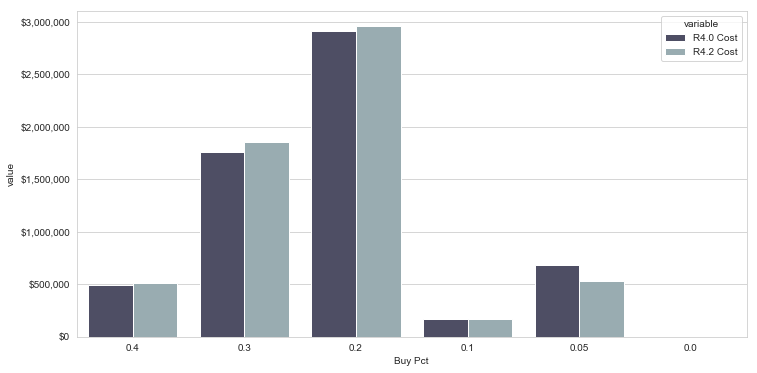

In [51]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data=df_PctCost_melt,
            x='BuyOfferPct',
            y='value',
            hue='variable',
            alpha=1,
            palette='bone',
            order = [0.4, 0.3, 0.2, 0.1, 0.05, 0.0],
            ax=ax)
ax.set_yticklabels('${:,.0f}'.format(int(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Pct')
ax.set_ylabel
plt.show()

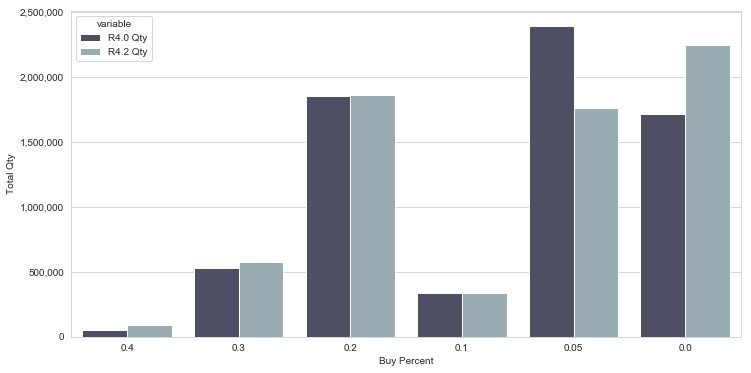

In [65]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data=df_PctQty_melt,
            x='BuyOfferPct',
            y='value',
            hue='variable',
            alpha=1,
            palette='bone',
            order = [0.4, 0.3, 0.2, 0.1, 0.05, 0.0],
            ax=ax)
#ax.set_xticklabels('{:,.2f}%'.format(float(x)) for x in ax.get_xticks())
ax.set_yticklabels('{:,.0f}'.format(int(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Percent')
ax.set_ylabel('Total Qty')
plt.show()

In [59]:
df_PctCost.sum()[['R40TotalCost', 'R42TotalCost']]

R40TotalCost    6023875.49
R42TotalCost    6023190.90
dtype: float64

In [66]:
df_PctQty_melt

,BuyOfferPct,variable,value
5,0.40,R4.0 Qty,50457
11,0.40,R4.2 Qty,87564
4,0.30,R4.0 Qty,526135
10,0.30,R4.2 Qty,576543
3,0.20,R4.0 Qty,1853477
9,0.20,R4.2 Qty,1860189
2,0.10,R4.0 Qty,336216
8,0.10,R4.2 Qty,334716
1,0.05,R4.0 Qty,2390667
7,0.05,R4.2 Qty,1762366
